In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels
sns.set()

In [148]:
data = pd.read_csv('social_network.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [149]:
print(f'rows: {data.shape[0]}, columns: {data.shape[1]}')

rows: 400, columns: 5


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [151]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [152]:
data.corr(numeric_only=True)

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


### PRE-PROCESSING

##### The columns
- Gender         
- Age          
- EstimatedSalary  
- Purchased 

##### To do
- Handling missing vlaues
- Handling duplicated
- Handling anomalies
- Handling outliers
- Normalization

In [153]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [154]:
data.duplicated().sum()

0

In [155]:
data.drop_duplicates(inplace=True)

In [156]:
data.drop('User ID', axis=1, inplace=True)

In [157]:
data.shape

(400, 4)

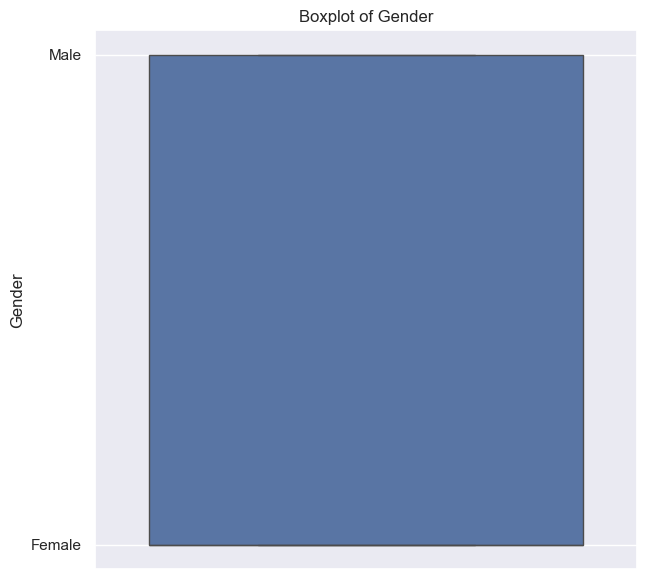

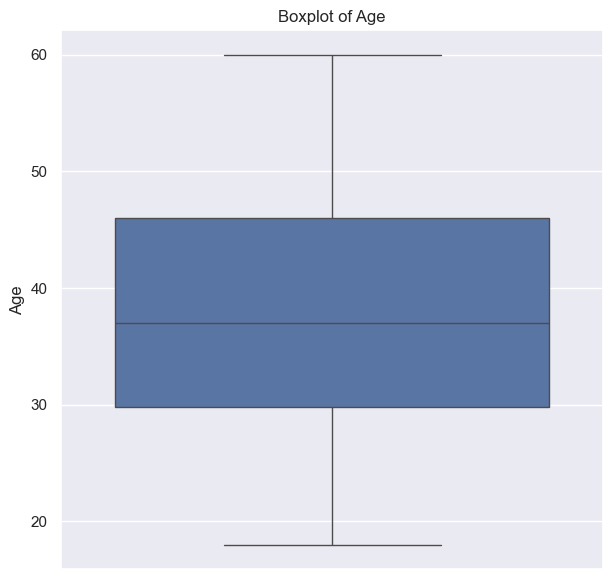

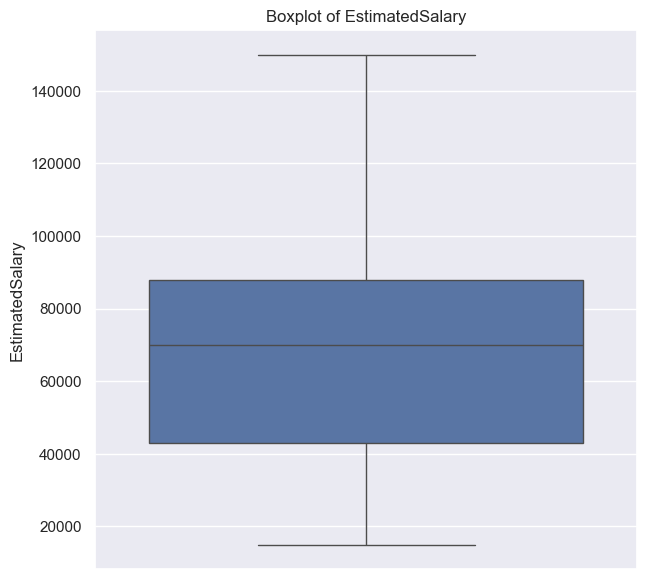

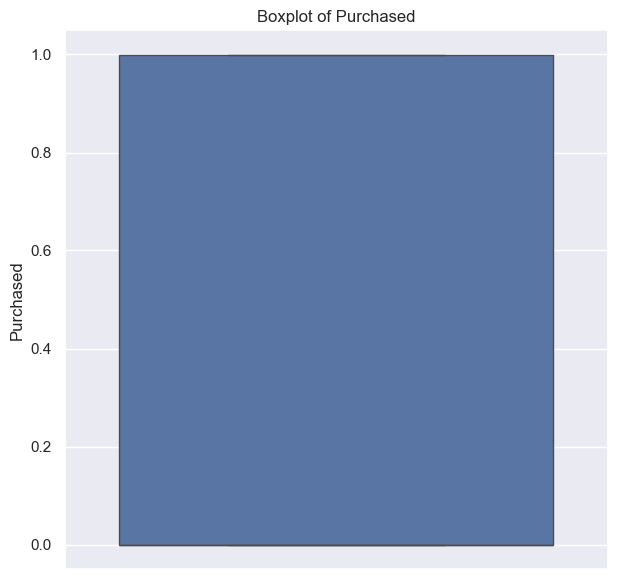

In [158]:
# checking outliers using boxplot 
for i in data.columns:
	plt.figure(figsize=[7,7])
	sns.boxplot(y=data[i])
	plt.title(f'Boxplot of {i}')
	plt.show()

In [159]:
#checking outliers using interquartile range
# Q1 = np.percentile(data, 25)
# Q3 = np.percentile(data, 75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# outliers = []
# for i in data:
# 	for x in data[i]:
# 		if x < lower_bound or x > upper_bound:
# 			outliers.append(x)
# len(outliers)

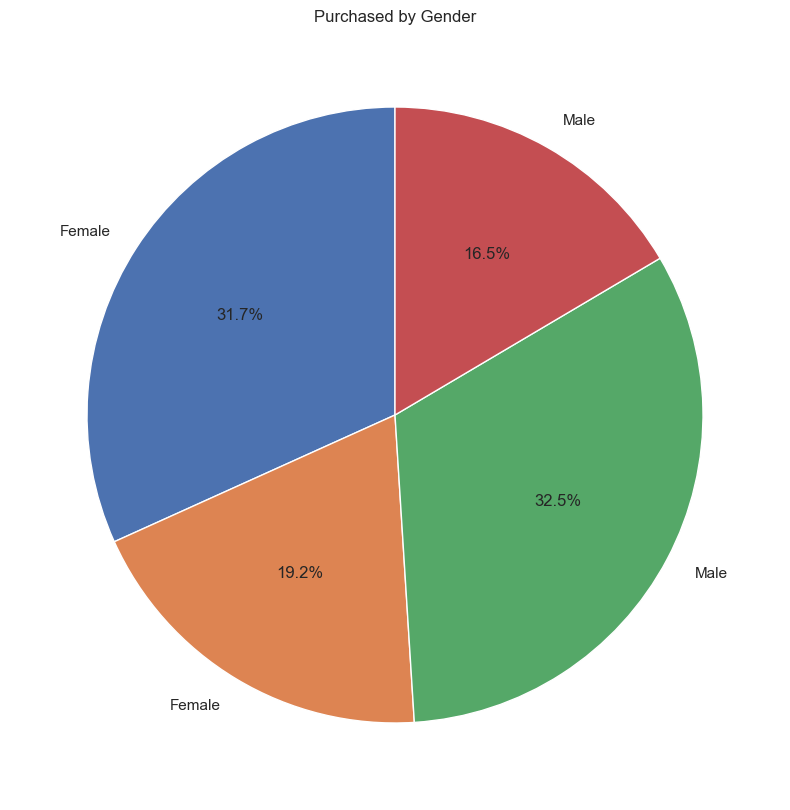

In [160]:
# Purchased based on gender, age, and estimated salary

gender_purchased = data.groupby(['Gender','Purchased']).size().reset_index(name='Count')
labels = gender_purchased['Gender']
values = gender_purchased['Count']


plt.figure(figsize=(10,10))
plt.pie(
	values,
	labels=labels,
	autopct='%1.1f%%', 
	startangle = 90,
)
plt.title('Purchased by Gender')
plt.show()

In [161]:
data['Gender'].replace({'Male': 0, 'Female':1}, inplace=True)

/var/folders/_m/x30w5wkd6l59g090_2t6sv1w0000gn/T/ipykernel_5950/1897755642.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].replace({'Male': 0, 'Female':1}, inplace=True)
/var/folders/_m/x30w5wkd6l59g090_2t6sv1w0000gn/T/ipykernel_5950/1897755642.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

### MODELLING
- train and test split
- algorithm building: sigmoid
- accuracy test: cross entropy
- new instance input
- saving model
- using model

Maximum likelihood

In [ ]:
class LogisticRegression:

	
	def __init__(self, lr = 0.001, epochs = 2000):
		self.lr = lr
		self.epochs = epochs
		self.weighs = None
		self.bias = None
		self.costs = []



	def train_test_split(self, X, y, test_size):
		#shuffling data
		indices = np.arange(X.shape[0])
		np.random.shuffle(indices)

		#split data
		test_count = int(test_size * X.shape[0])
		test_indices = indices[:test_count]
		train_indices = indices[test_count:]

		X_train, y_train = X[train_indices], y[train_indices]
		X_test, y_test = X[test_indices], y[test_indices]

		return X_train, y_train, X_test, y_test



	def sigmoid(self, z):
		return (1 / (1 + np.exp(-z)))



	# Cost function: Binary Cross-Entropy
	def cost_function(self, y_true, y_pred):
		epsilon = 1e-9
		# Without `epsilon`, operations like \(\log(0)\) or \(\log(1)\) would result in undefined or extreme values infty\)). 
		# Adding `epsilon` prevents such issues, keeping the calculations well-defined and reliable.

		y1 = y_true * np.log(y_pred + epsilon)
		y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
		cost = -np.mean(y1 + y2)
		return cost


	
	def gradient_descent(self, X, y):   
		n_samples, n_features = X.shape

		# init parameters
		self.weighs = np.zeros(n_features)
		self.bias = 0

		# 	FORWARD PROPAGATION
		Z = np.dot(X, self.weighs) + self.bias # linear function
		A = self.sigmoid(Z) # apply sigmoid to get probabilities

		for _ in range(self.epochs):
			# Compute cost
			self.costs.append(self.cost_function(y, A))

			# 	BACKWARD PROPAGATION (COMPUTE GRADIENT)
			dZ = A - y
			dW = ( 1 / n_samples ) * np.dot(dZ, X) 
			db = ( 1 / n_samples ) * np.sum(dZ)

			# update weighs and bias using gradient descent
			self.weighs -= self.lr * dW
			self.bias -= self.lr * db



	def predict(self, X):
		threshold = .5
		Z = np.dot(X, self.weighs) + self.bias # linear function
		A = self.sigmoid(Z) # apply sigmoid to get probabilities
		A_cls = [1 if i > threshold else 0 for i in A]
		return np.array(A_cls) # return binary prediction



In [223]:
class LogisticRegressionMedium:


	def __init__(self, learning_rate=0.001, n_iters=1000):
		self.lr = learning_rate
		self.n_iters = n_iters
		self.weights = None
		self.bias = None
		self.losses = []
			


	#Sigmoid method
	def _sigmoid(self, x):
		return 1 / (1 + np.exp(-x))



	def compute_loss(self, y_true, y_pred):
		# binary cross entropy
		epsilon = 1e-9
		y1 = y_true * np.log(y_pred + epsilon)
		y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
		return -np.mean(y1 + y2)



	def feed_forward(self,X):
		z = np.dot(X, self.weights) + self.bias
		A = self._sigmoid(z)
		return A



	def fit(self, X, y):
		n_samples, n_features = X.shape

		# init parameters
		self.weights = np.zeros(n_features)
		self.bias = 0

		# gradient descent
		for _ in range(self.n_iters):
				A = self.feed_forward(X)
				self.losses.append(self.compute_loss(y,A))
				dz = A - y # derivative of sigmoid and bce X.T*(A-y)
				# compute gradients
				dw = (1 / n_samples) * np.dot(dz, X) 
				db = (1 / n_samples) * np.sum(dz)
				# update parameters
				self.weights -= self.lr * dw
				self.bias -= self.lr * db
				

				
	def predict(self, X):
		threshold = .5
		y_hat = np.dot(X, self.weights) + self.bias
		y_predicted = self._sigmoid(y_hat)
		y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]
		return np.array(y_predicted_cls)

### **Forward Propagation:**
The process of calculating the model's predictions using the current parameters (weights and bias).


### **Backward Propagation:**
The process of computing the gradients of the loss function with respect to the parameters and updating the parameters to minimize the loss.
Backward propagation helps adjust the model’s parameters to move closer to the optimal decision boundary.


### **Why there's this process:**
This two process (forward and backward) is done in order to optimize the model so that it can fit the data, in order to find the line that best separates the classes.

#### Plots and the line curves before backward propagation

In [202]:
from sklearn import preprocessing

### Medium's Models

In [ ]:

trainTest = LogisticRegression()
model = LogisticRegressionMedium()

x = np.array(data['Age'])
y = np.array(data['Purchased'])

x = x.reshape(-1, 1)

x_normalize = preprocessing.StandardScaler()
x_norm = x_normalize.fit_transform(x)

x_train, y_train, x_test, y_test = trainTest.train_test_split(x_norm, y, 0.3)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(y_pred)
print(y_test)
correct = np.sum(y_test == y_pred)
print(correct, " out of ", len(y_test))
print(f'{correct / len(y_test) * 100:.2f}%')


[0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1
 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1
 0 0 1 1 0 1 1 1 0]
[0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1
 0 0 1 1 0 1 1 1 0]
97  out of  120
80.83%


### Aqilah's Model

In [ ]:

model = LogisticRegression()

x = np.array(data['Age'])
y = np.array(data['Purchased'])
x = x.reshape(-1, 1)
x_normalize = preprocessing.StandardScaler()
x_norm = x_normalize.fit_transform(x)

x_train, y_train, x_test, y_test = model.train_test_split(x_norm, y, 0.3)

model.gradient_descent(x_train, y_train)
y_pred = model.predict(x_test)

print(y_pred)
print(y_test)

correct = np.sum(y_test == y_pred)
print(correct, " out of ", len(y_test))
print(f'{correct / len(y_test) * 100:.2f}%')

[0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0
 0 1 0 0 1 1 0 0 1]
[0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1
 0 1 0 0 1 1 0 0 0]
95  out of  120
79.17%


# Compare The Logistic Plot before trained and after trained
Using regplot